# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file='../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(np.concatenate((y_train,y_test,y_valid))))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

133
41


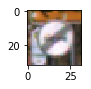

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
print(index)
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

In [17]:
# Let's see what are those images looks like after normalization
from pandas.io.parsers import read_csv
signnames = read_csv("signnames.csv").values[:, 1]

def display_random_data(x,y,signnames,load_index = None):
    num_image_shown = 8
    sign_classes, class_indices, class_counts = np.unique(y, return_index = True, return_counts = True)
    
    # Save random index for comparsion
    save_index = np.zeros([len(sign_classes),num_image_shown])
    
    for c,c_index,c_count in zip(sign_classes, class_indices, class_counts):
        print('Class ',c,'--',signnames[c],' # Samples:',str(c_count))
        
        if load_index == None:
            random_index = random.sample(range(c_index,c_index+c_count),num_image_shown)
            save_index[c] = random_index
        else:
            random_index = (load_index[c]).astype(np.int32)
#         print(random_index)
        fig,axis = plt.subplots(1,num_image_shown,figsize=(20,22))
        for i in range(num_image_shown):
            axis[i].axis('off')
            axis[i].imshow(x[random_index[i]].squeeze(),cmap='gray')
        plt.show()
    return save_index

Class  0 -- Speed limit (20km/h)  # Samples: 180


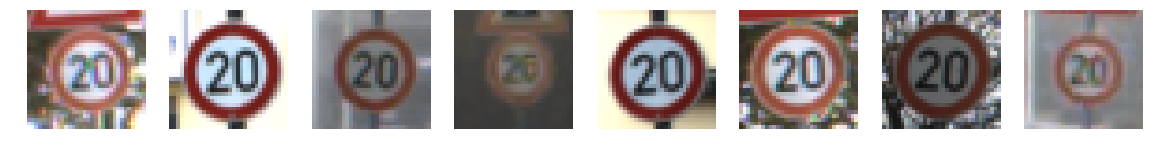

Class  1 -- Speed limit (30km/h)  # Samples: 1980


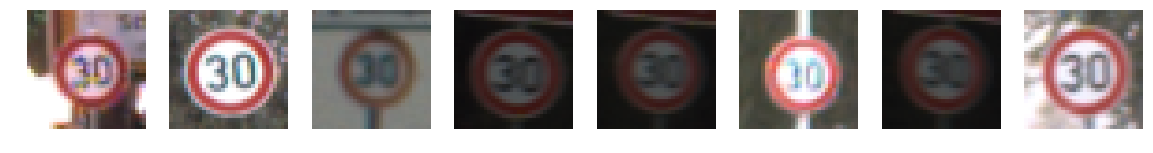

Class  2 -- Speed limit (50km/h)  # Samples: 2010


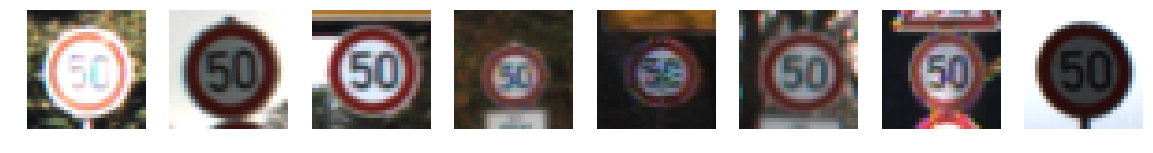

Class  3 -- Speed limit (60km/h)  # Samples: 1260


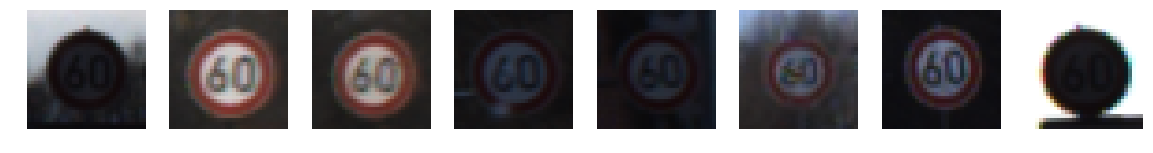

Class  4 -- Speed limit (70km/h)  # Samples: 1770


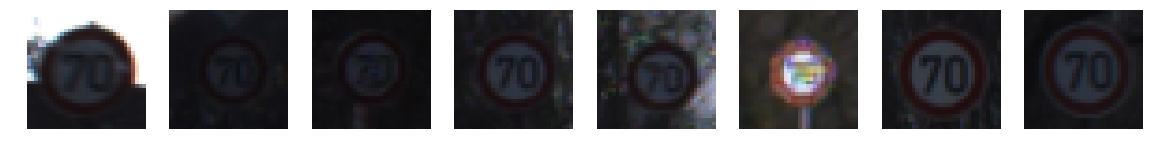

Class  5 -- Speed limit (80km/h)  # Samples: 1650


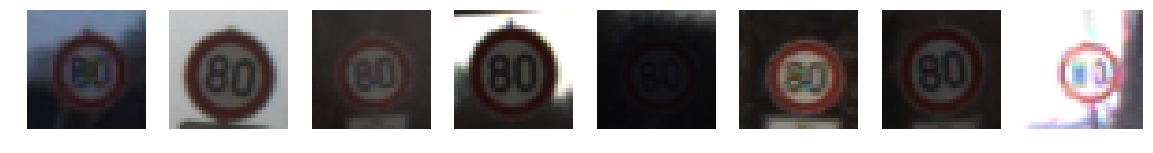

Class  6 -- End of speed limit (80km/h)  # Samples: 360


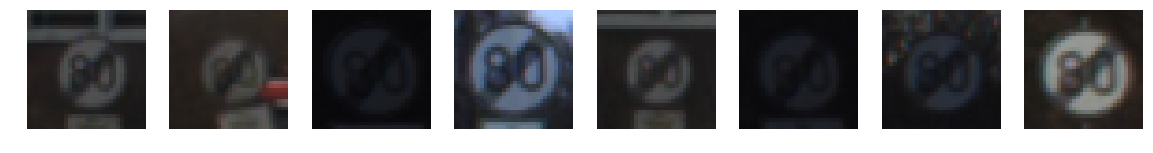

Class  7 -- Speed limit (100km/h)  # Samples: 1290


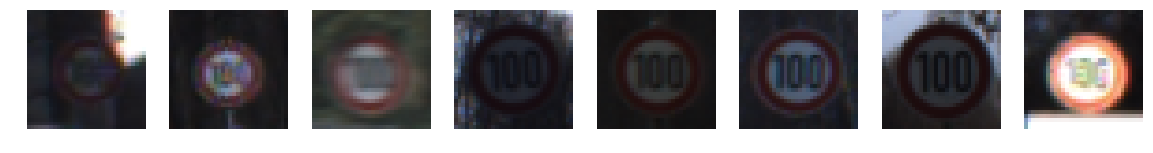

Class  8 -- Speed limit (120km/h)  # Samples: 1260


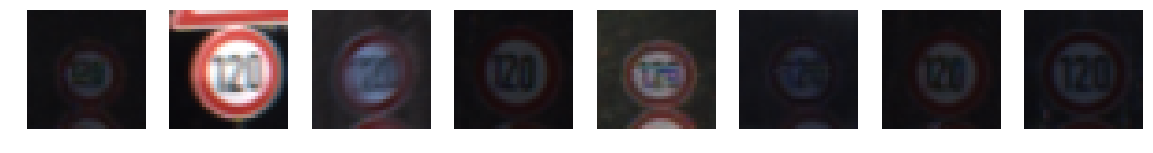

Class  9 -- No passing  # Samples: 1320


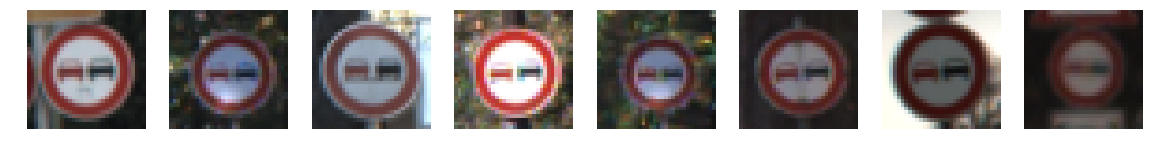

Class  10 -- No passing for vehicles over 3.5 metric tons  # Samples: 1800


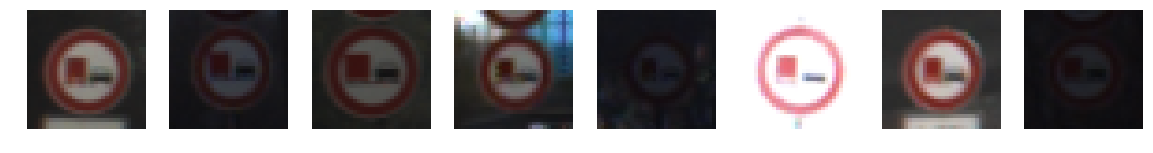

Class  11 -- Right-of-way at the next intersection  # Samples: 1170


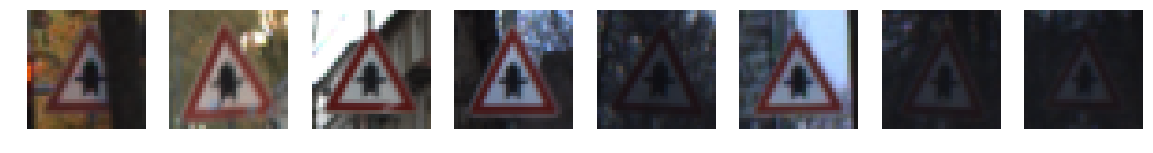

Class  12 -- Priority road  # Samples: 1890


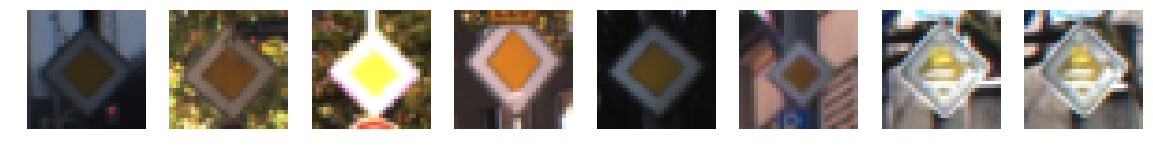

Class  13 -- Yield  # Samples: 1920


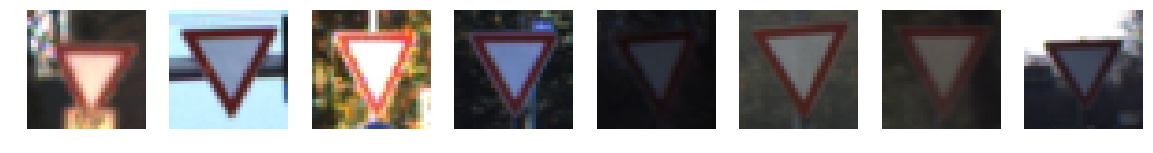

Class  14 -- Stop  # Samples: 690


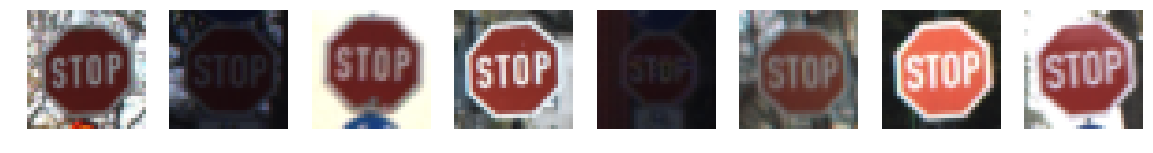

Class  15 -- No vehicles  # Samples: 540


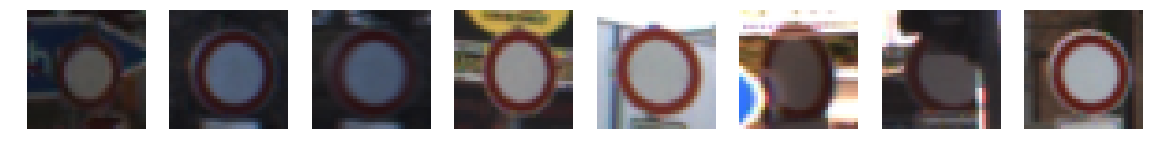

Class  16 -- Vehicles over 3.5 metric tons prohibited  # Samples: 360


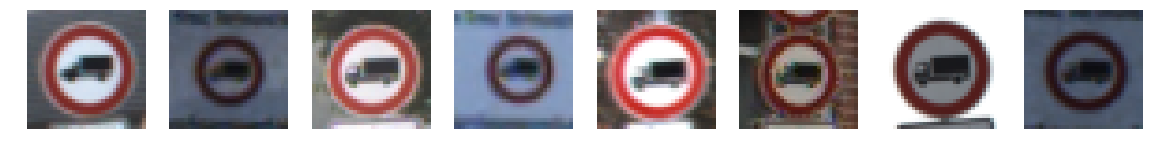

Class  17 -- No entry  # Samples: 990


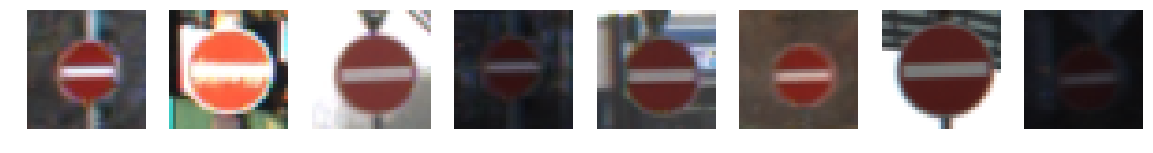

Class  18 -- General caution  # Samples: 1080


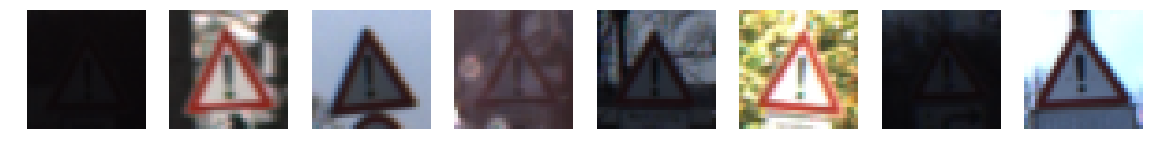

Class  19 -- Dangerous curve to the left  # Samples: 180


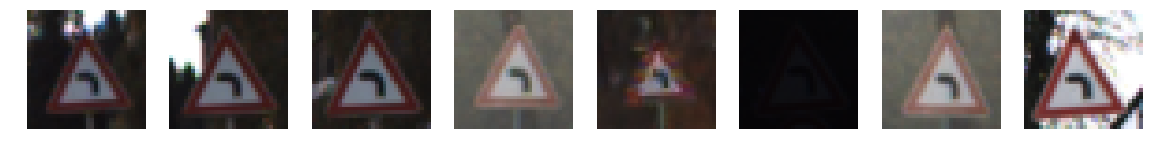

Class  20 -- Dangerous curve to the right  # Samples: 300


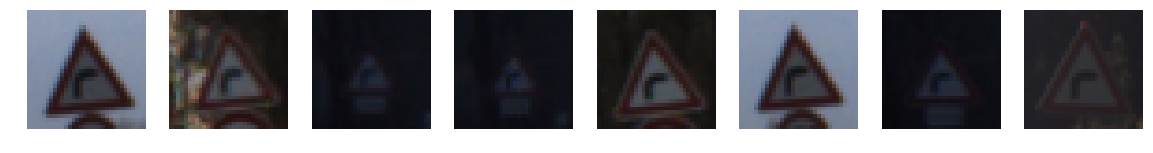

Class  21 -- Double curve  # Samples: 270


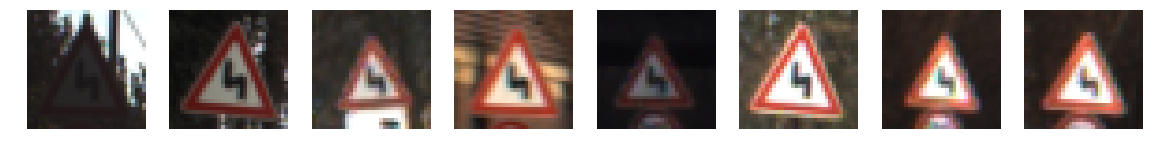

Class  22 -- Bumpy road  # Samples: 330


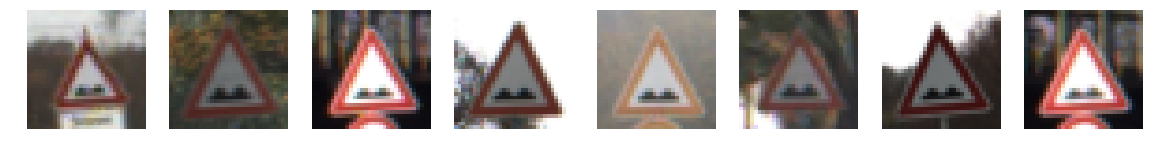

Class  23 -- Slippery road  # Samples: 450


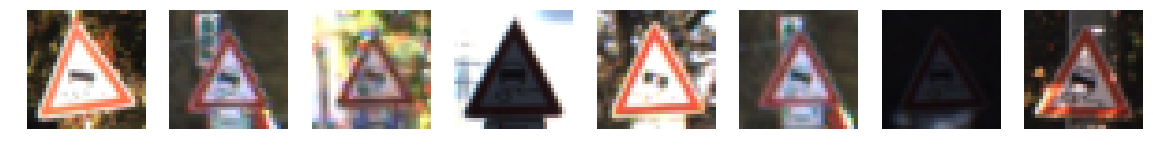

Class  24 -- Road narrows on the right  # Samples: 240


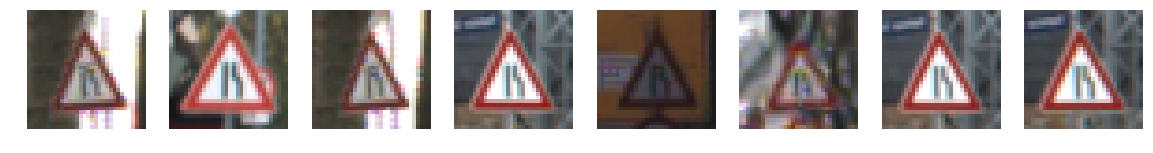

Class  25 -- Road work  # Samples: 1350


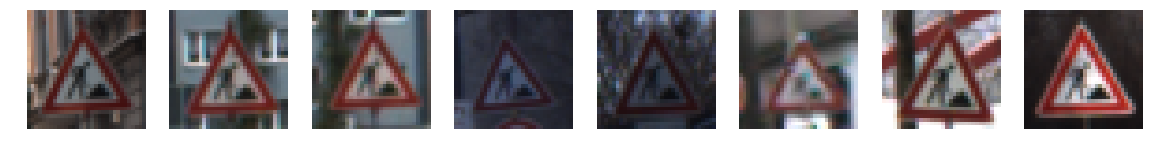

Class  26 -- Traffic signals  # Samples: 540


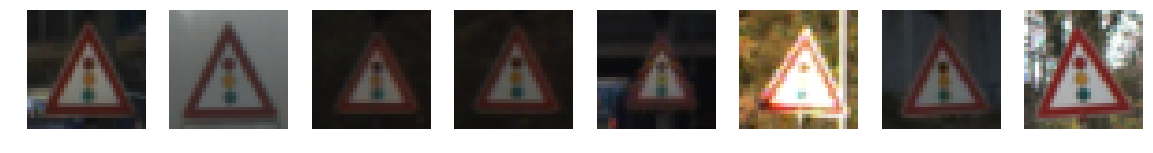

Class  27 -- Pedestrians  # Samples: 210


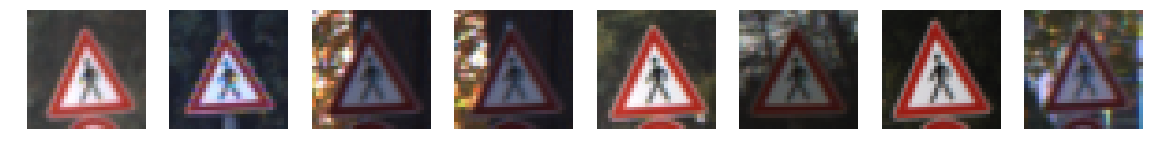

Class  28 -- Children crossing  # Samples: 480


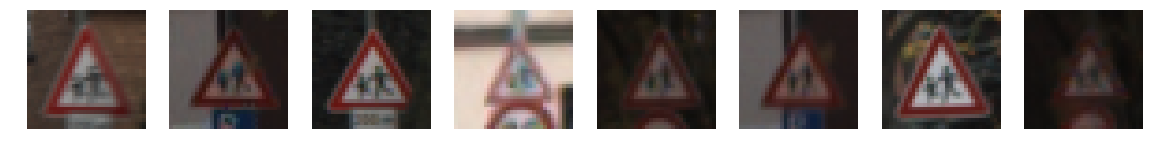

Class  29 -- Bicycles crossing  # Samples: 240


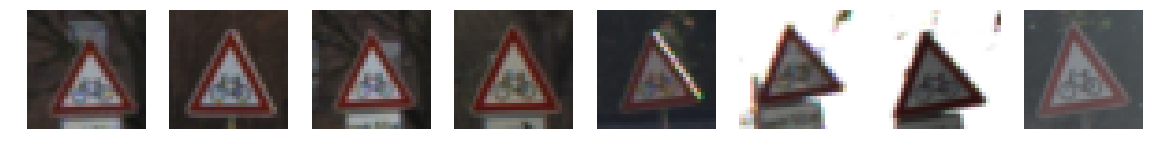

Class  30 -- Beware of ice/snow  # Samples: 390


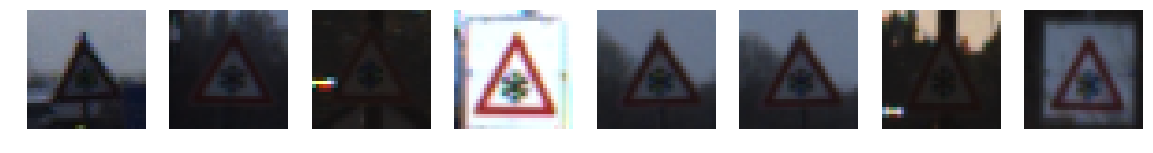

Class  31 -- Wild animals crossing  # Samples: 690


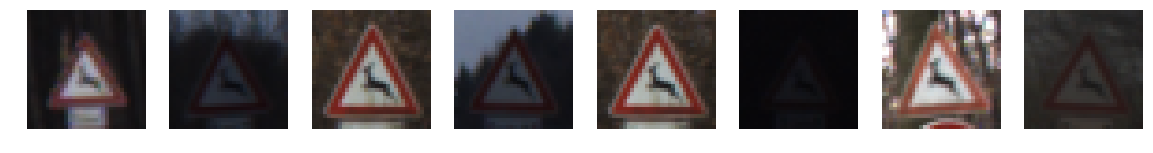

Class  32 -- End of all speed and passing limits  # Samples: 210


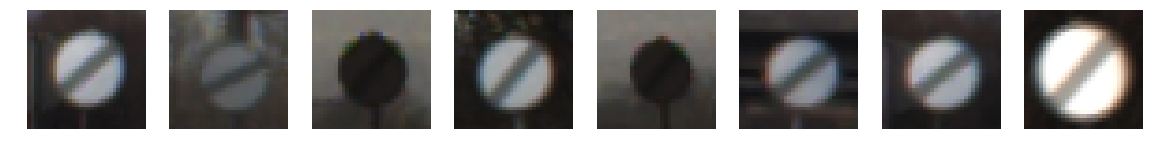

Class  33 -- Turn right ahead  # Samples: 599


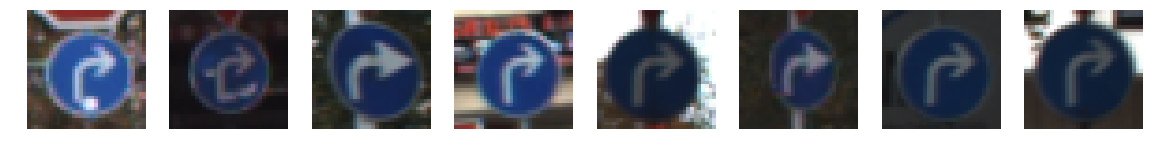

Class  34 -- Turn left ahead  # Samples: 360


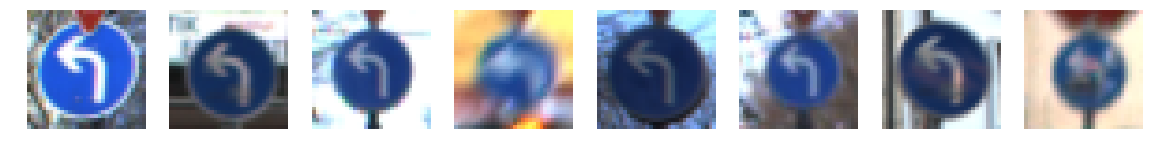

Class  35 -- Ahead only  # Samples: 1080


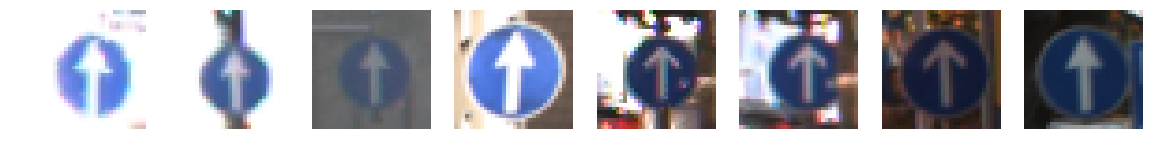

Class  36 -- Go straight or right  # Samples: 330


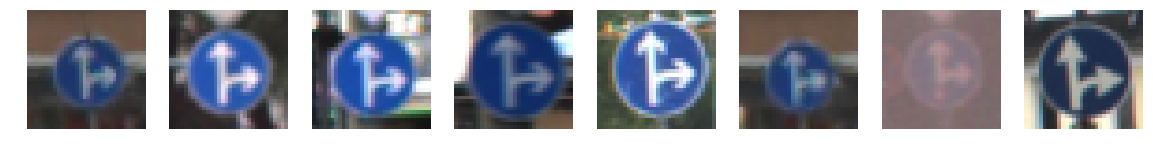

Class  37 -- Go straight or left  # Samples: 180


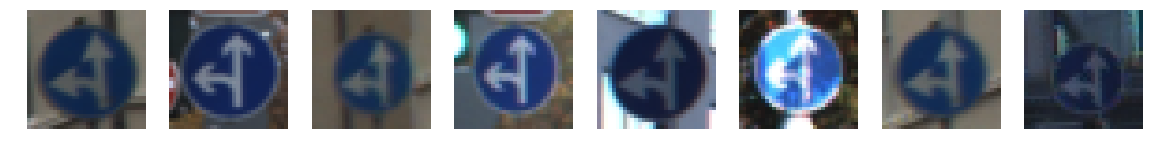

Class  38 -- Keep right  # Samples: 1860


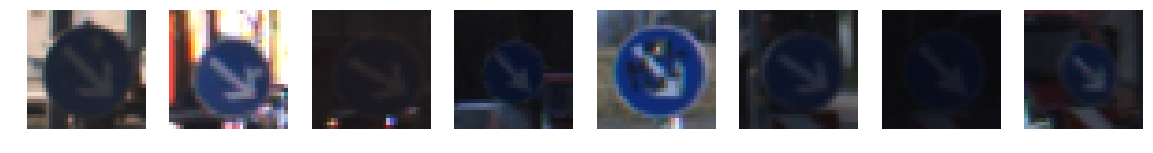

Class  39 -- Keep left  # Samples: 270


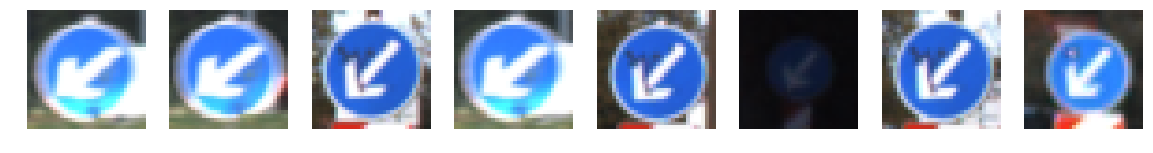

Class  40 -- Roundabout mandatory  # Samples: 300


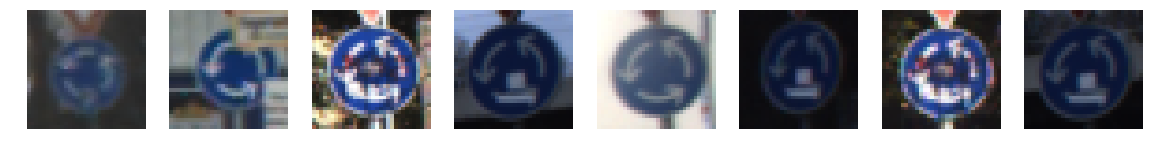

Class  41 -- End of no passing  # Samples: 210


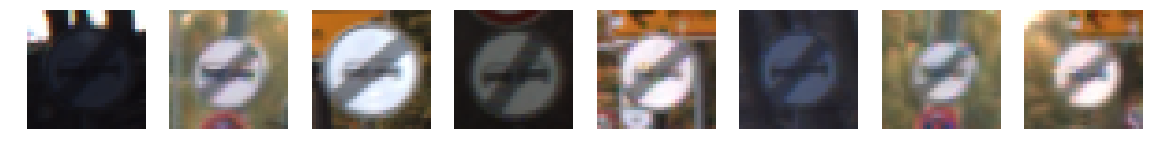

Class  42 -- End of no passing by vehicles over 3.5 metric tons  # Samples: 210


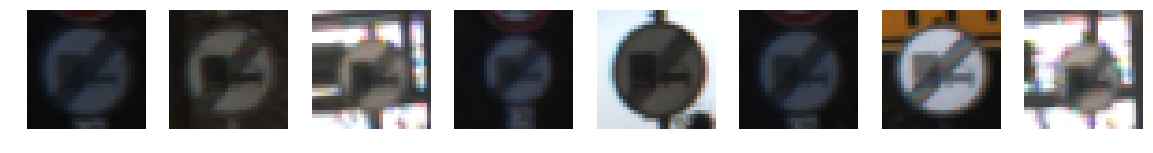

In [5]:
saved_index = display_random_data(X_train,y_train,signnames)

<Container object of 43 artists>

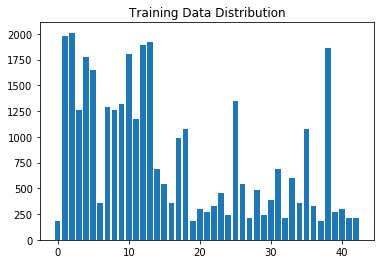

In [6]:
# Show the Distribution of the trainning data

sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
plt.figure()
plt.title('Training Data Distribution')

plt.bar(np.arange(n_classes), class_counts, align='center' )

Since there are lower number of samples for certain class in the training set, we need to create some "fake" data to fill those gap in order prepare our model for a better accuracy across all classes.

In [ ]:
for 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
import cv2
from skimage import exposure
def process_img(image):  
    # Perform Gamma Correction
    image = np.power(image,0.25)  
    grey_scale_weight = [0.2989, 0.5870, 0.1140]    
    result = np.dot(image,grey_scale_weight)  
    result = (result - 128)/128  
    return result[...,np.newaxis]

def norm_img_ahe(image):
    grey_scale_weight = [0.2989, 0.5870, 0.1140]
    result = np.dot(image,grey_scale_weight)
    result = (result/255.).astype(np.float32)
    for i in range(result.shape[0]):
        result[i] = exposure.equalize_adapthist(result[i])
        
#     result = (result - 128)/128
      
    return result[...,np.newaxis]

# clahe_img = norm_img_clahe(X_train[28497])

# image = np.power(X_train[28497],0.5)
# test_image = cv2.cvtColor(X_train[28497],cv2.COLOR_RGB2GRAY)
# print(test_image.shape)

# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
# image = clahe.apply(test_image)
# norm_img =(image - 128)/128

# fig,axis = plt.subplots(1,4,figsize=(10,12))
# axis[0].imshow(X_train[28497])
# axis[1].imshow(test_image,cmap='gray')
# axis[2].imshow(image,cmap='gray')
# axis[3].imshow(norm_img.squeeze(),cmap='gray')

# plt.show()
# print(image.shape)

# Reference https://github.com/vxy10/ImageAugmentation
def transform_img (img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
     # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# x_train = process_img(X_train)
# x_test = process_img(X_test)
# x_valid = process_img(X_valid)

%time x_train = norm_img_ahe(X_train)
# x_test = norm_img_ahe(X_test)
# x_valid = norm_img_ahe(X_valid)
print("training Image data shape =", x_train[0].shape)


/opt/conda/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


training Image data shape = (32, 32, 1)


Class  0 -- Speed limit (20km/h)  # Samples: 180
[10035  9974 10004 10051  9989 10045 10019  9993]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  from ipykernel import kernelapp as app


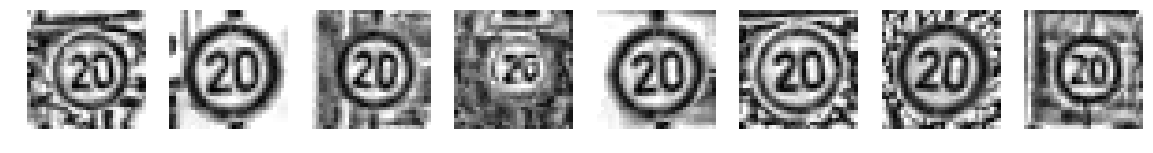

Class  1 -- Speed limit (30km/h)  # Samples: 1980
[3213 3441 2694 3912 3904 3608 3905 4056]


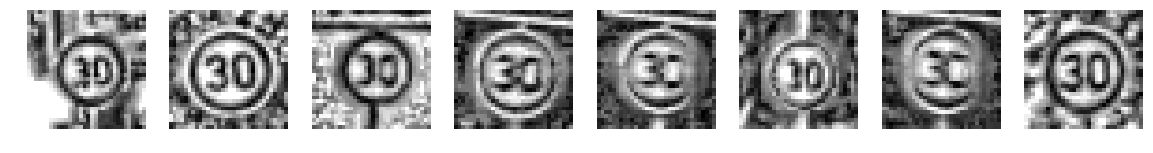

Class  2 -- Speed limit (50km/h)  # Samples: 2010
[33172 32935 31761 31621 32288 32567 32051 32457]


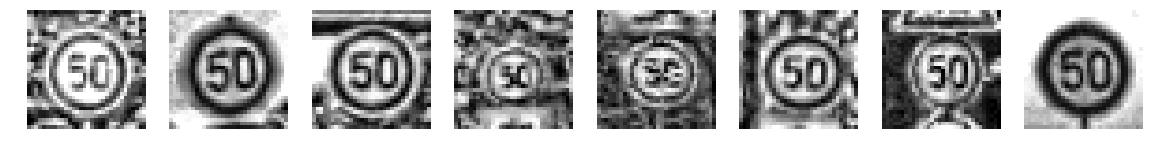

Class  3 -- Speed limit (60km/h)  # Samples: 1260
[6257 6468 6465 5546 6442 5705 6494 6227]


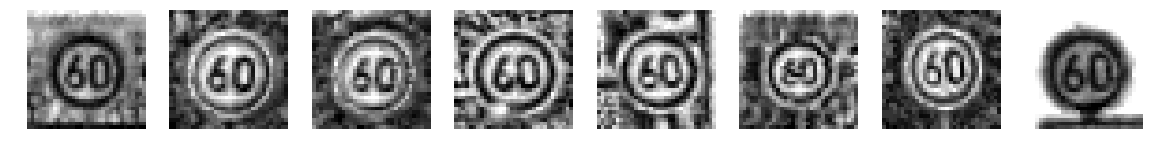

Class  4 -- Speed limit (70km/h)  # Samples: 1770
[8069 7118 8437 7604 7595 8371 7580 7528]


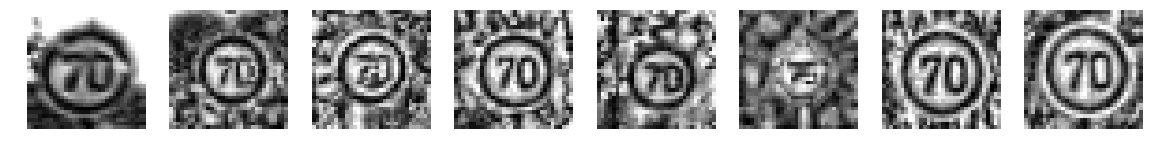

Class  5 -- Speed limit (80km/h)  # Samples: 1650
[13380 12921 13361 12886 13482 13331 13369 13890]


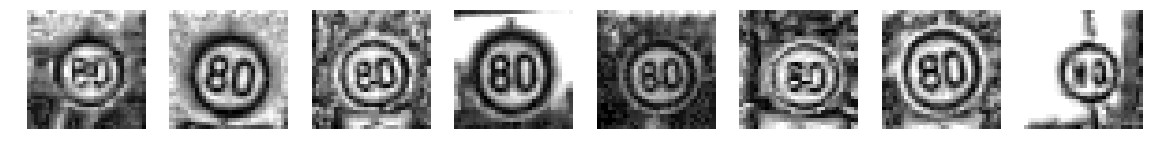

Class  6 -- End of speed limit (80km/h)  # Samples: 360
[21612 21454 21805 21590 21607 21794 21648 21740]


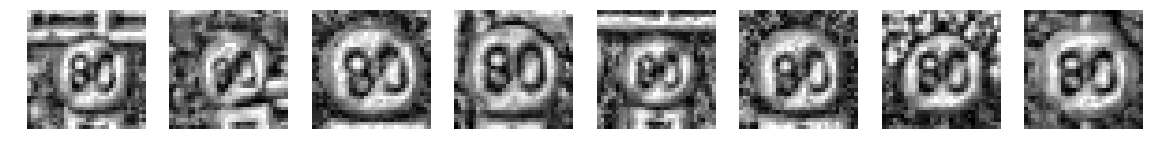

Class  7 -- Speed limit (100km/h)  # Samples: 1290
[24001 23733 24354 23875 24474 24050 23843 24582]


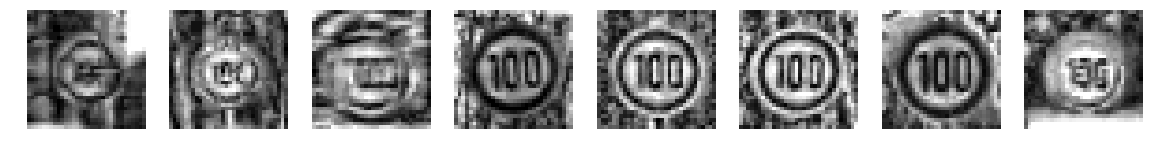

Class  8 -- Speed limit (120km/h)  # Samples: 1260
[16416 16527 16342 16817 16689 16593 16812 16311]


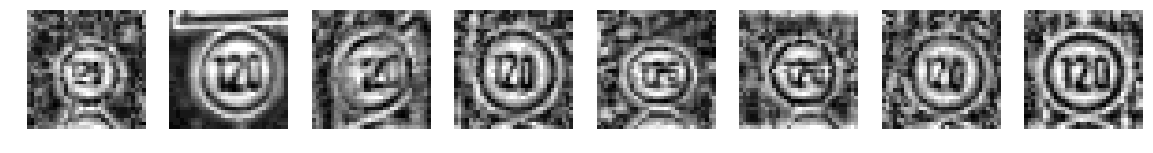

Class  9 -- No passing  # Samples: 1320
[12138 11689 11997 11055 11683 11594 11577 11375]


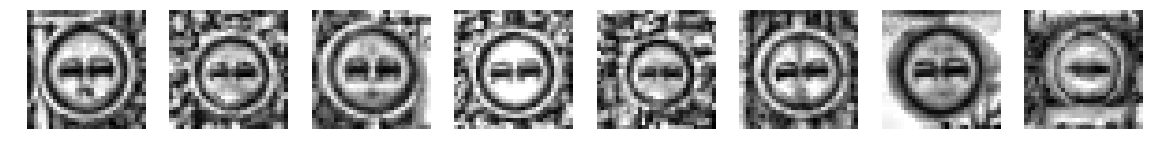

Class  10 -- No passing for vehicles over 3.5 metric tons  # Samples: 1800
[18771 18670 18808 18580 17882 17366 18559 17587]


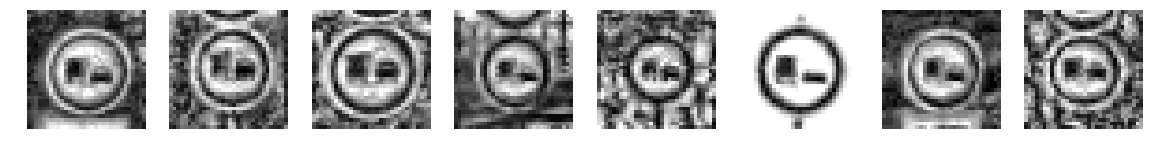

Class  11 -- Right-of-way at the next intersection  # Samples: 1170
[9660 8956 9505 9296 9742 8803 9733 9730]


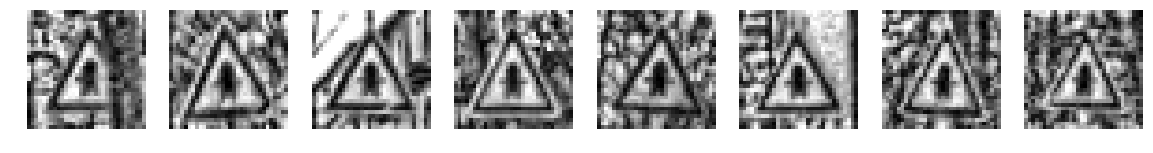

Class  12 -- Priority road  # Samples: 1890
[27623 29149 28187 27928 28706 27725 27559 27560]


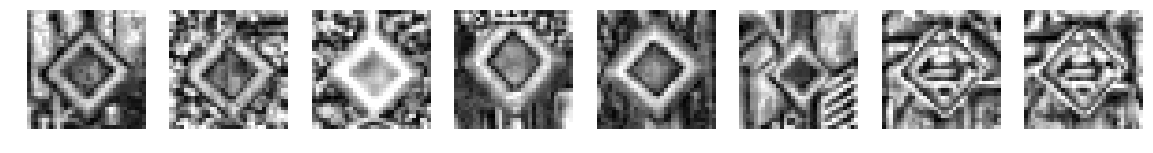

Class  13 -- Yield  # Samples: 1920
[22921 22253 22662 23161 23705 23575 22581 23028]


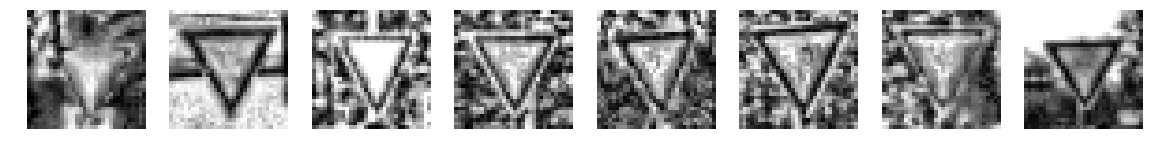

Class  14 -- Stop  # Samples: 690
[29397 29237 29747 29605 29219 29810 29357 29484]


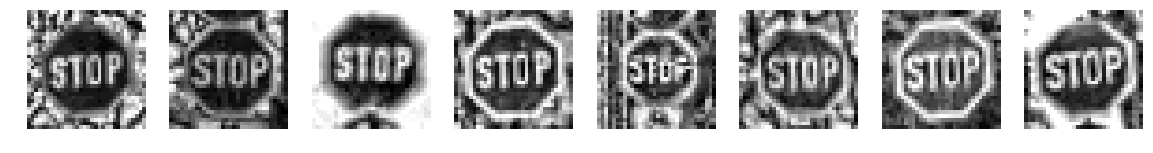

Class  15 -- No vehicles  # Samples: 540
[30210 29986 29998 30429 30346 30276 30391 30137]


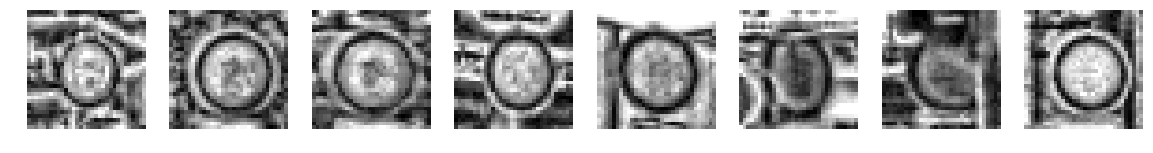

Class  16 -- Vehicles over 3.5 metric tons prohibited  # Samples: 360
[5018 5050 5264 5163 5249 5141 5338 5061]


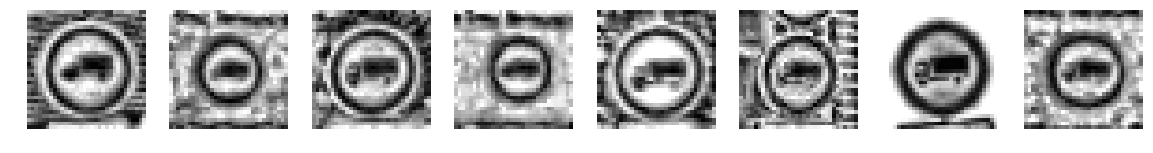

Class  17 -- No entry  # Samples: 990
[30995 31424 30914 30782 31090 30515 30928 30751]


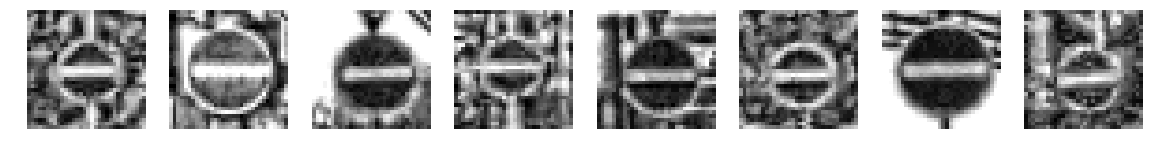

Class  18 -- General caution  # Samples: 1080
[21218 21008 21381 20880 20745 20586 21279 20548]


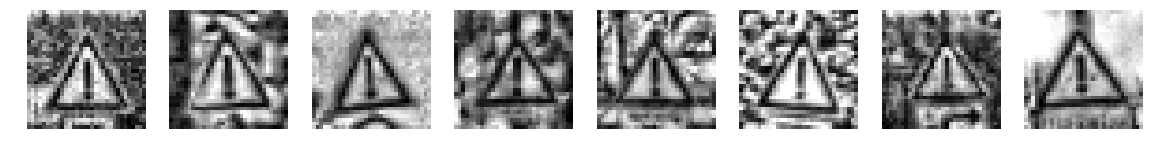

Class  19 -- Dangerous curve to the left  # Samples: 180
[6670 6676 6679 6733 6780 6652 6736 6806]


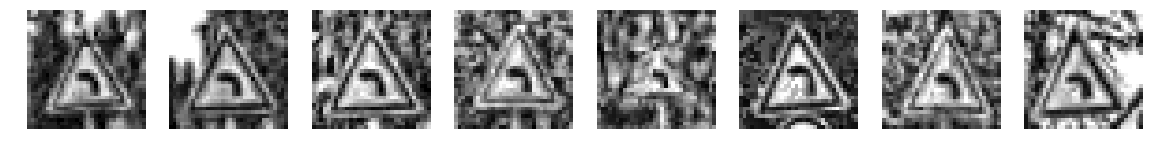

Class  20 -- Dangerous curve to the right  # Samples: 300
[26024 26079 25954 25952 26085 26022 25964 26216]


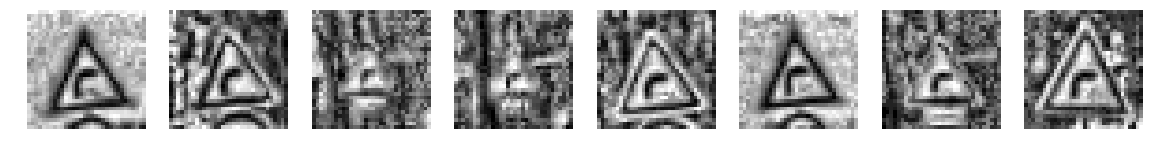

Class  21 -- Double curve  # Samples: 270
[25736 25888 25743 25794 25836 25909 25691 25696]


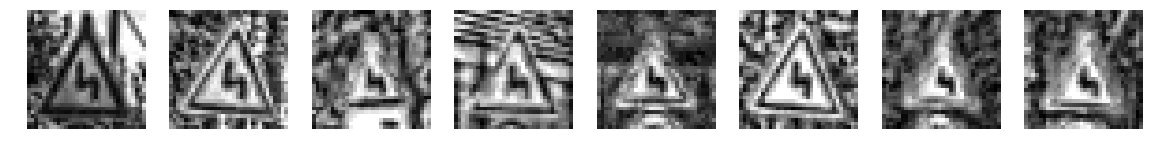

Class  22 -- Bumpy road  # Samples: 330
[4537 4739 4604 4827 4699 4724 4648 4606]


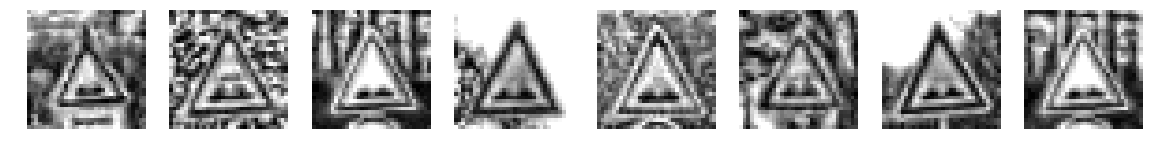

Class  23 -- Slippery road  # Samples: 450
[2089 1865 2166 2159 2019 1866 1815 2211]


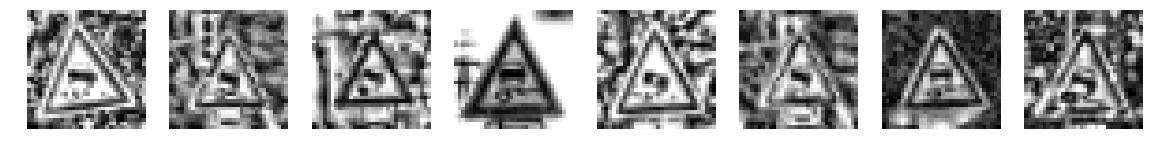

Class  24 -- Road narrows on the right  # Samples: 240
[10808 10873 10807 10907 10959 10924 10906 10892]


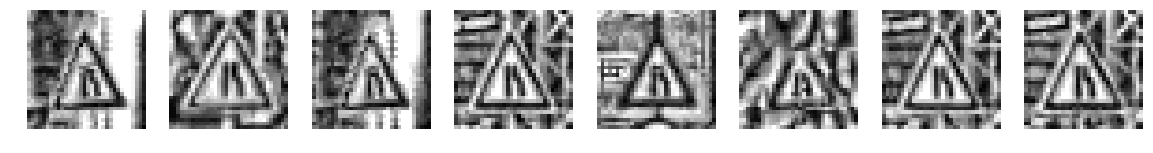

Class  25 -- Road work  # Samples: 1350
[33834 34127 34122 33615 33860 34561 33527 33499]


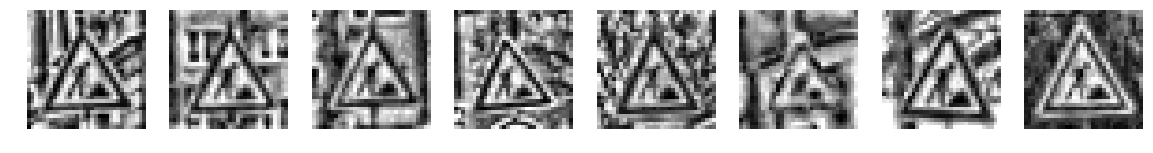

Class  26 -- Traffic signals  # Samples: 540
[1611 1653 1274 1280 1595 1723 1458 1436]


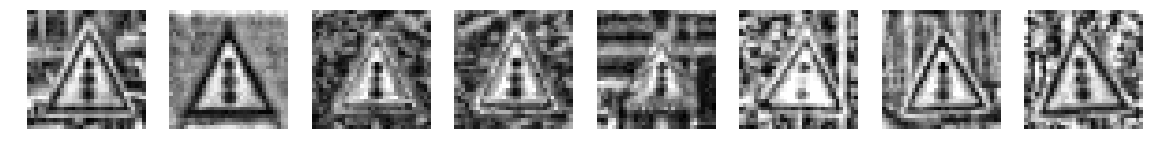

Class  27 -- Pedestrians  # Samples: 210
[10395 10419 10371 10372 10402 10463 10409 10353]


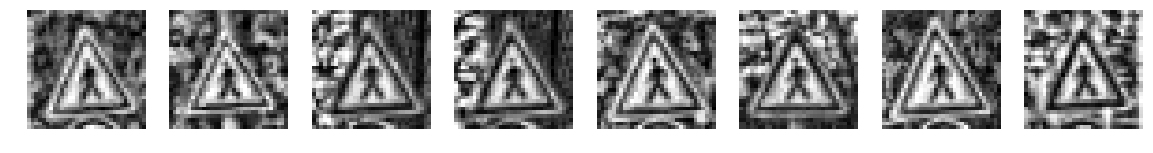

Class  28 -- Children crossing  # Samples: 480
[27237 27094 27225 27239 26890 27097 26988 26883]


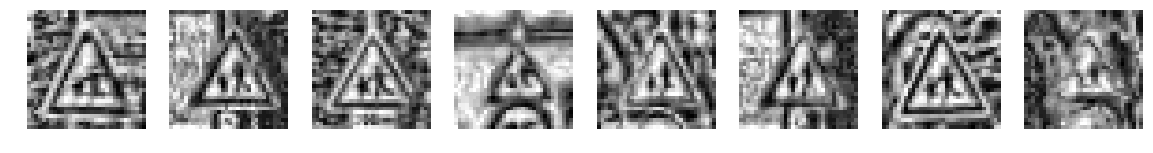

Class  29 -- Bicycles crossing  # Samples: 240
[10571 10697 10575 10604 10661 10750 10766 10678]


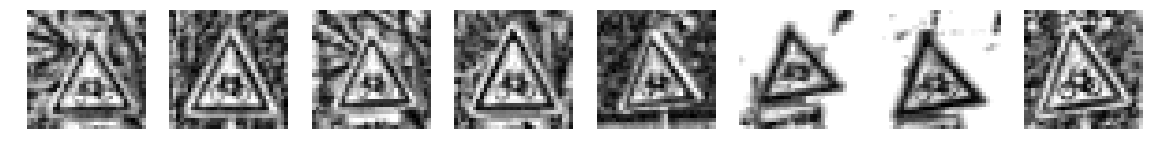

Class  30 -- Beware of ice/snow  # Samples: 390
[25051 25132 25357 25185 25241 25242 25362 25380]


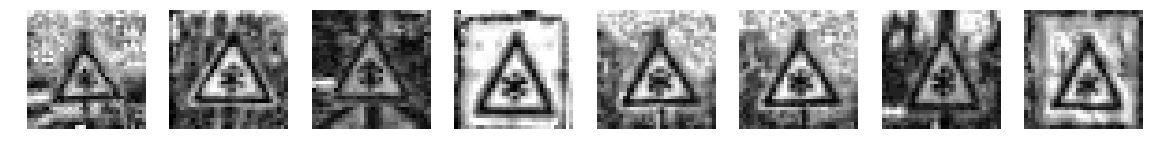

Class  31 -- Wild animals crossing  # Samples: 690
[365 653 892 616 894 333 837 232]


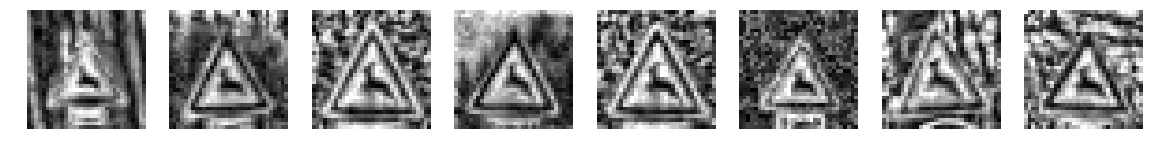

Class  32 -- End of all speed and passing limits  # Samples: 210
[10147 10236 10264 10300 10261 10204 10144 10198]


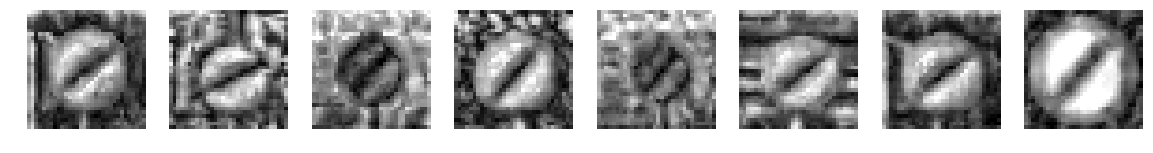

Class  33 -- Turn right ahead  # Samples: 599
[26682 26284 26576 26654 26506 26553 26275 26438]


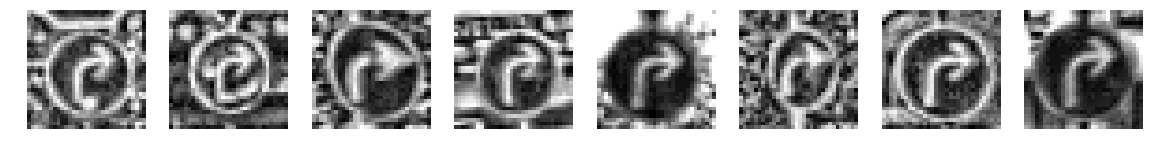

Class  34 -- Turn left ahead  # Samples: 360
[20218 20137 20172 20282 20189 20046 20158 20345]


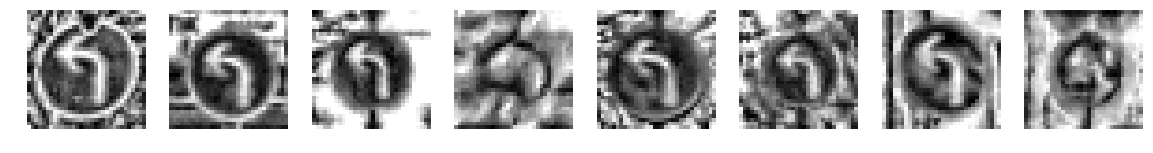

Class  35 -- Ahead only  # Samples: 1080
[19149 19623 19242 19976 19420 19424 19668 19826]


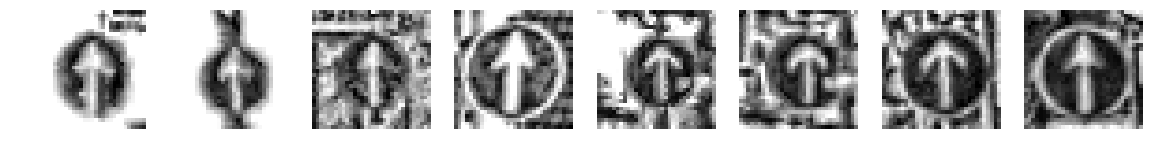

Class  36 -- Go straight or right  # Samples: 330
[ 904 1211 1031 1048  982  901 1111 1164]


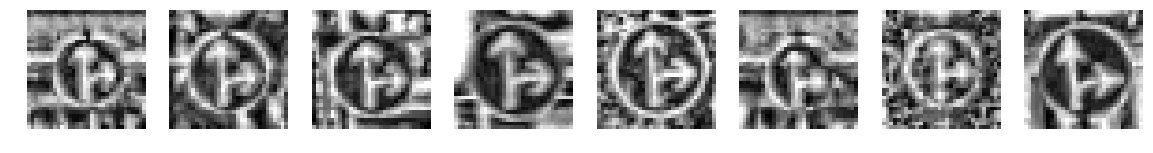

Class  37 -- Go straight or left  # Samples: 180
[4859 4946 4844 4936 5006 4978 4853 4985]


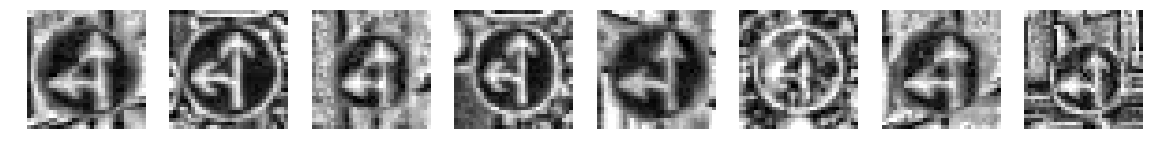

Class  38 -- Keep right  # Samples: 1860
[15051 15823 15797 14046 15679 15097 14506 14822]


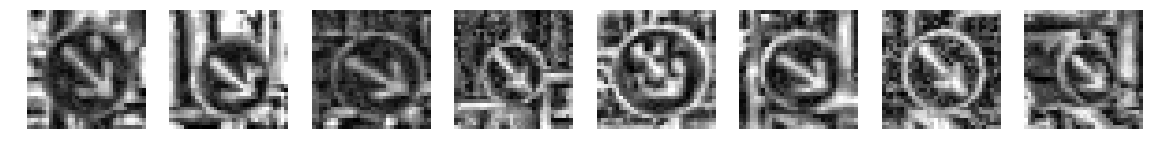

Class  39 -- Keep left  # Samples: 270
[25666 25672 25518 25667 25513 25532 25517 25449]


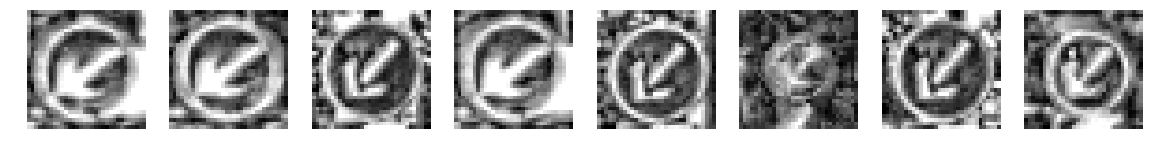

Class  40 -- Roundabout mandatory  # Samples: 300
[4296 4231 4496 4344 4379 4326 4489 4339]


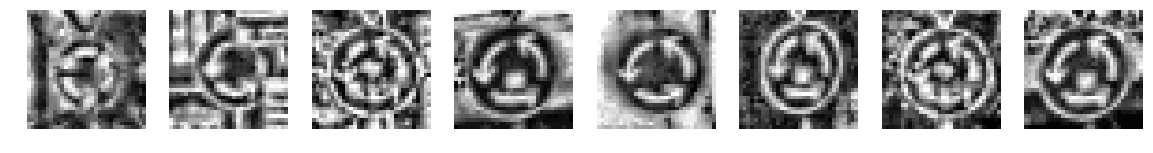

Class  41 -- End of no passing  # Samples: 210
[204  98 145  23 132 188  92 123]


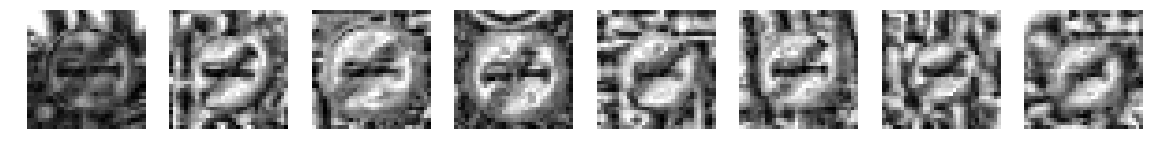

Class  42 -- End of no passing by vehicles over 3.5 metric tons  # Samples: 210
[9926 9770 9934 9906 9954 9919 9894 9932]


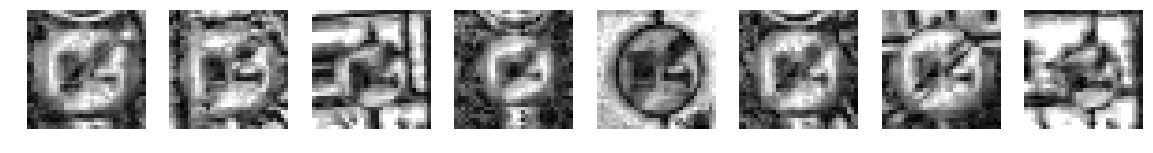

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0

In [18]:
_ = display_random_data(x_train,y_train,signnames,load_index=saved_index)

In [19]:
%time x_train_test = process_img(X_train)

CPU times: user 8.77 s, sys: 952 ms, total: 9.72 s
Wall time: 10.1 s


Class  0 -- Speed limit (20km/h)  # Samples: 180
[10035  9974 10004 10051  9989 10045 10019  9993]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  from ipykernel import kernelapp as app


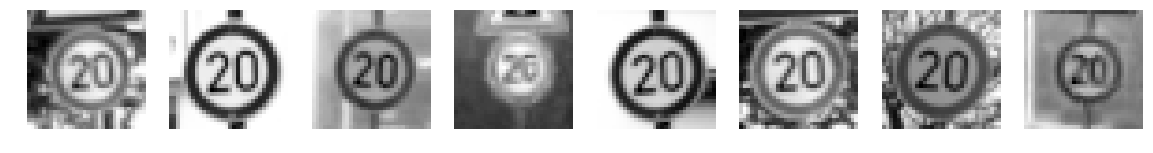

Class  1 -- Speed limit (30km/h)  # Samples: 1980
[3213 3441 2694 3912 3904 3608 3905 4056]


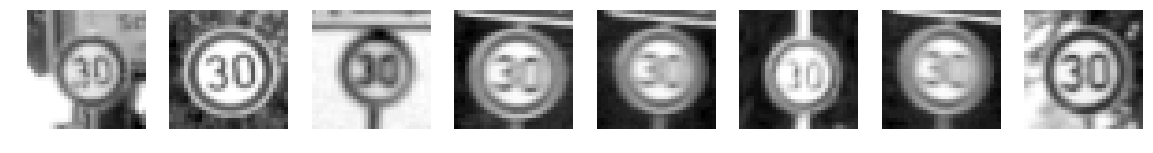

Class  2 -- Speed limit (50km/h)  # Samples: 2010
[33172 32935 31761 31621 32288 32567 32051 32457]


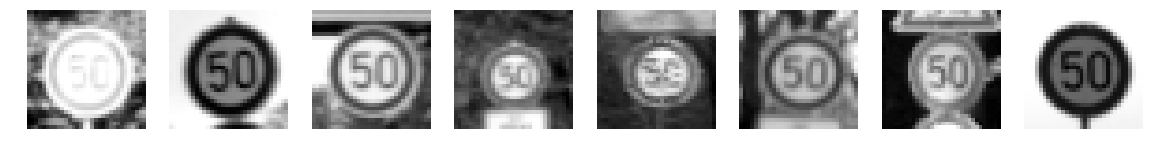

Class  3 -- Speed limit (60km/h)  # Samples: 1260
[6257 6468 6465 5546 6442 5705 6494 6227]


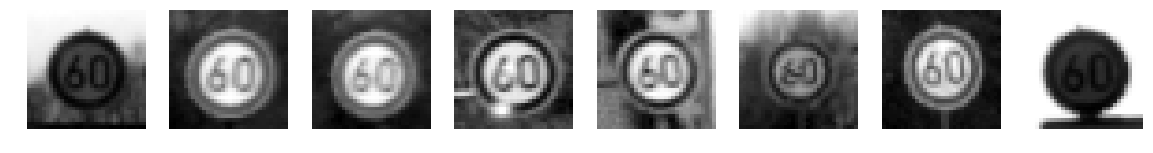

Class  4 -- Speed limit (70km/h)  # Samples: 1770
[8069 7118 8437 7604 7595 8371 7580 7528]


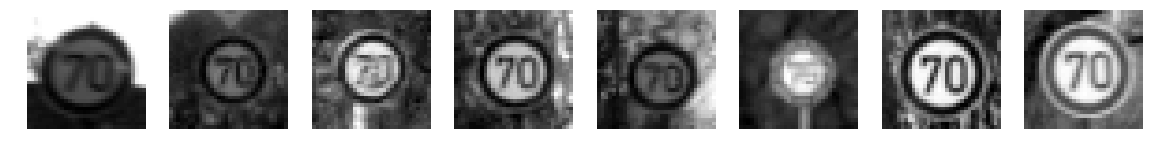

Class  5 -- Speed limit (80km/h)  # Samples: 1650
[13380 12921 13361 12886 13482 13331 13369 13890]


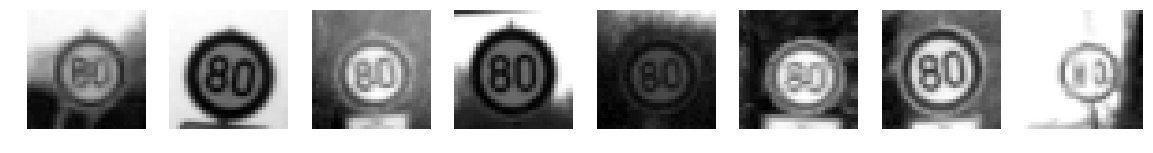

Class  6 -- End of speed limit (80km/h)  # Samples: 360
[21612 21454 21805 21590 21607 21794 21648 21740]


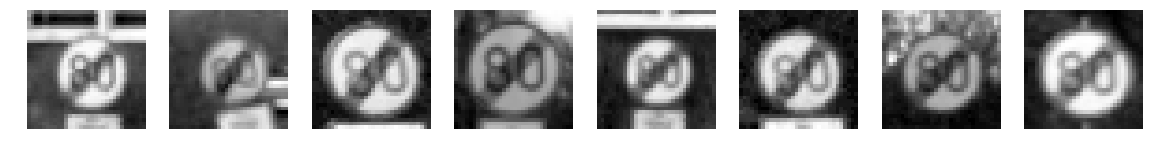

Class  7 -- Speed limit (100km/h)  # Samples: 1290
[24001 23733 24354 23875 24474 24050 23843 24582]


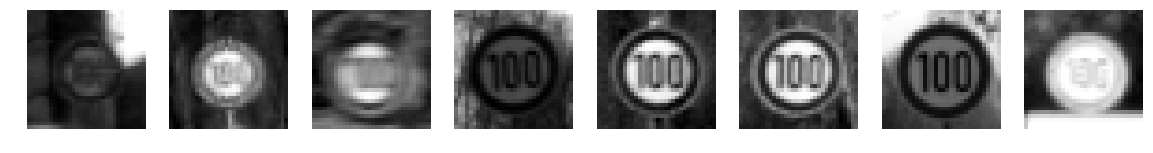

Class  8 -- Speed limit (120km/h)  # Samples: 1260
[16416 16527 16342 16817 16689 16593 16812 16311]


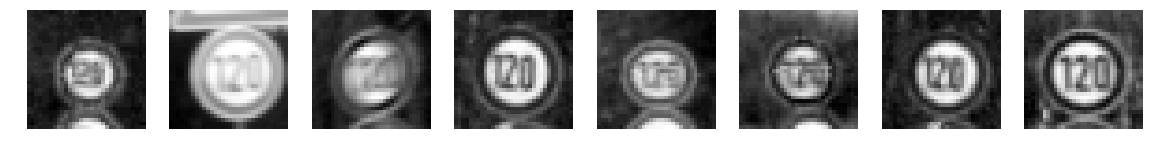

Class  9 -- No passing  # Samples: 1320
[12138 11689 11997 11055 11683 11594 11577 11375]


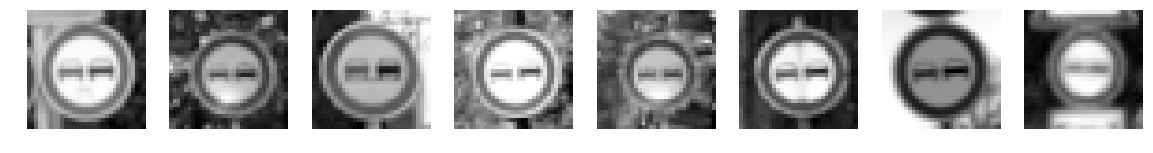

Class  10 -- No passing for vehicles over 3.5 metric tons  # Samples: 1800
[18771 18670 18808 18580 17882 17366 18559 17587]


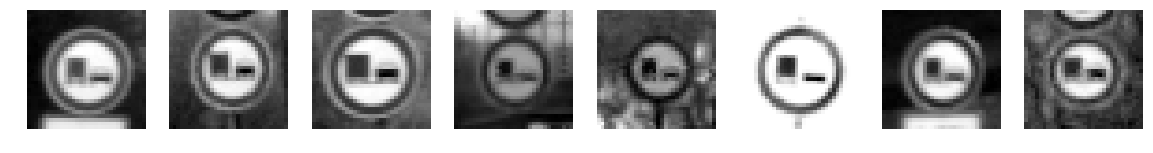

Class  11 -- Right-of-way at the next intersection  # Samples: 1170
[9660 8956 9505 9296 9742 8803 9733 9730]


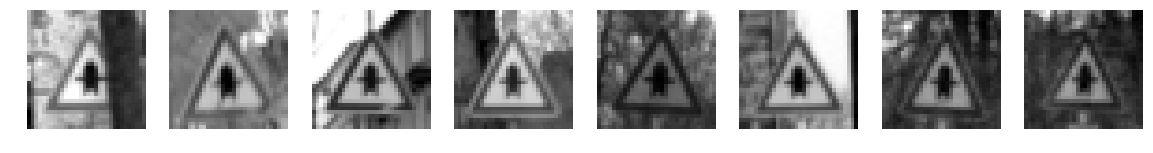

Class  12 -- Priority road  # Samples: 1890
[27623 29149 28187 27928 28706 27725 27559 27560]


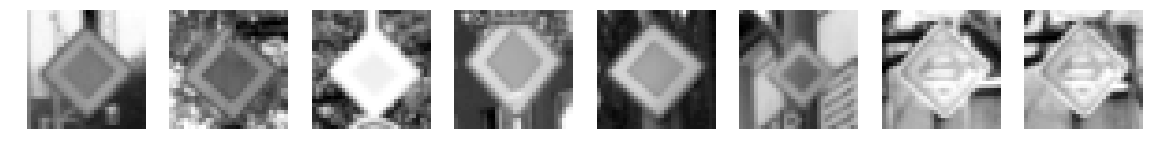

Class  13 -- Yield  # Samples: 1920
[22921 22253 22662 23161 23705 23575 22581 23028]


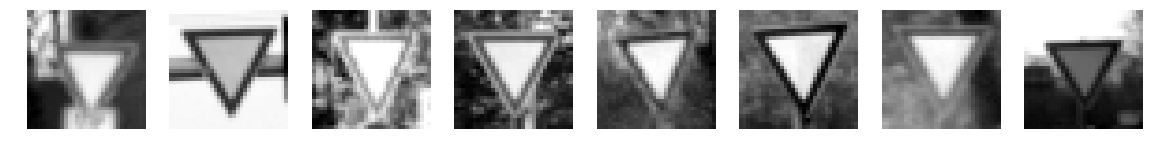

Class  14 -- Stop  # Samples: 690
[29397 29237 29747 29605 29219 29810 29357 29484]


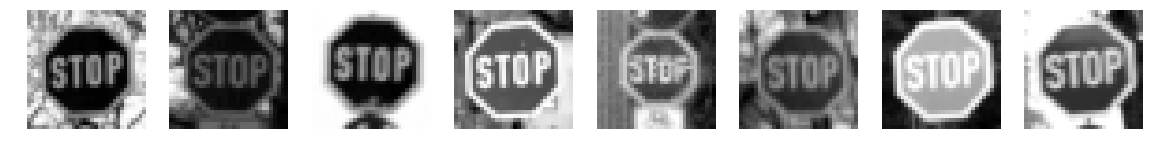

Class  15 -- No vehicles  # Samples: 540
[30210 29986 29998 30429 30346 30276 30391 30137]


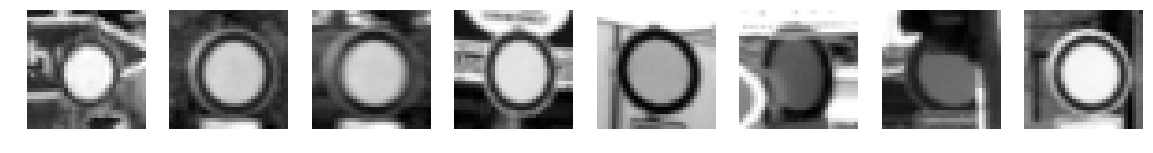

Class  16 -- Vehicles over 3.5 metric tons prohibited  # Samples: 360
[5018 5050 5264 5163 5249 5141 5338 5061]


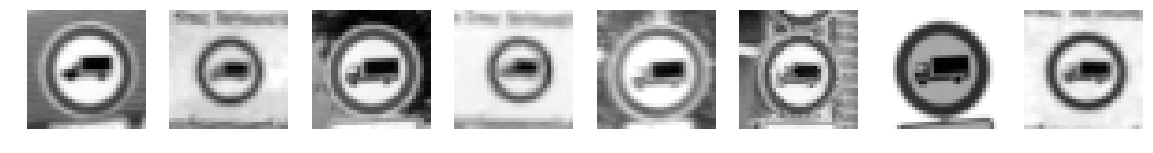

Class  17 -- No entry  # Samples: 990
[30995 31424 30914 30782 31090 30515 30928 30751]


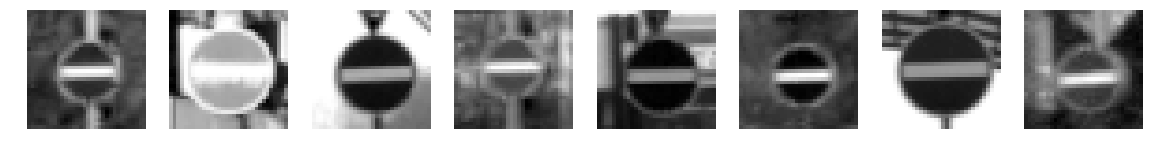

Class  18 -- General caution  # Samples: 1080
[21218 21008 21381 20880 20745 20586 21279 20548]


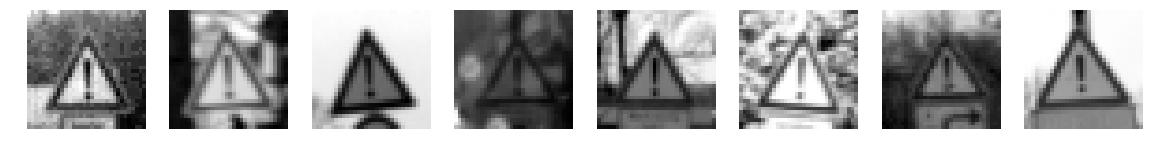

Class  19 -- Dangerous curve to the left  # Samples: 180
[6670 6676 6679 6733 6780 6652 6736 6806]


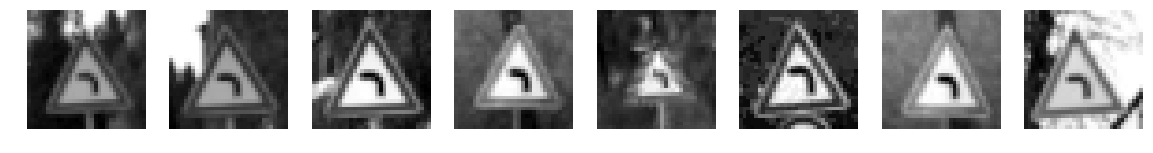

Class  20 -- Dangerous curve to the right  # Samples: 300
[26024 26079 25954 25952 26085 26022 25964 26216]


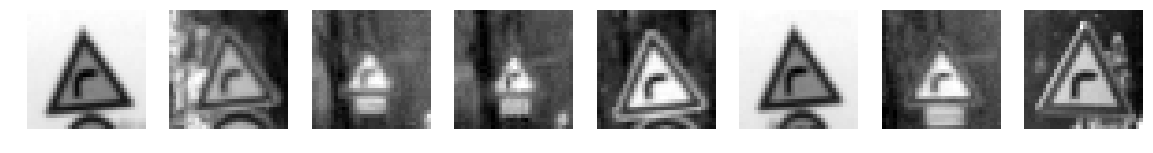

Class  21 -- Double curve  # Samples: 270
[25736 25888 25743 25794 25836 25909 25691 25696]


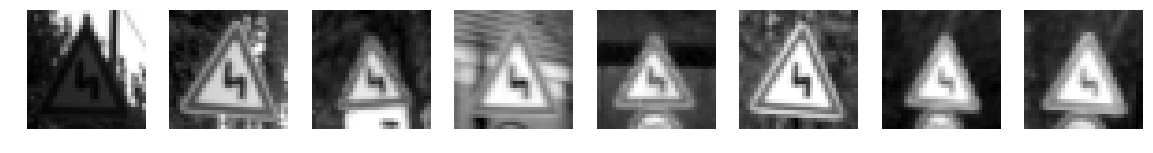

Class  22 -- Bumpy road  # Samples: 330
[4537 4739 4604 4827 4699 4724 4648 4606]


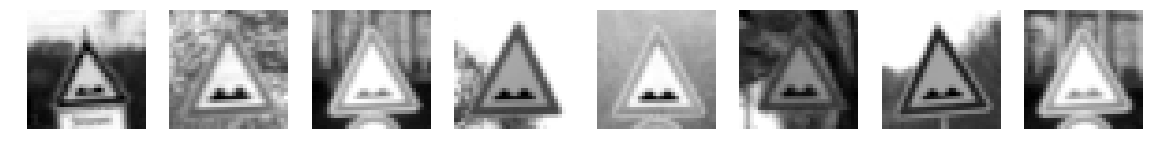

Class  23 -- Slippery road  # Samples: 450
[2089 1865 2166 2159 2019 1866 1815 2211]


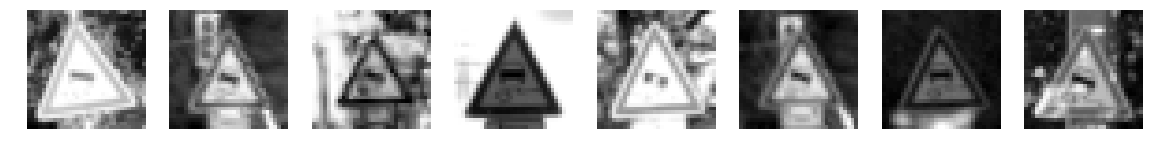

Class  24 -- Road narrows on the right  # Samples: 240
[10808 10873 10807 10907 10959 10924 10906 10892]


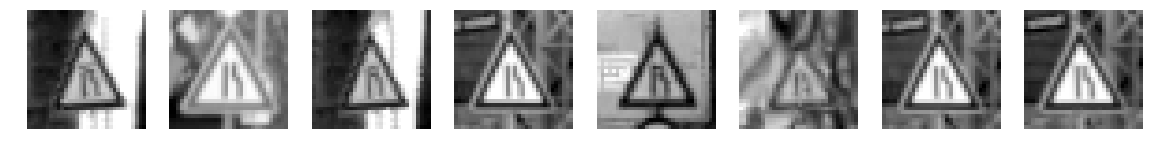

Class  25 -- Road work  # Samples: 1350
[33834 34127 34122 33615 33860 34561 33527 33499]


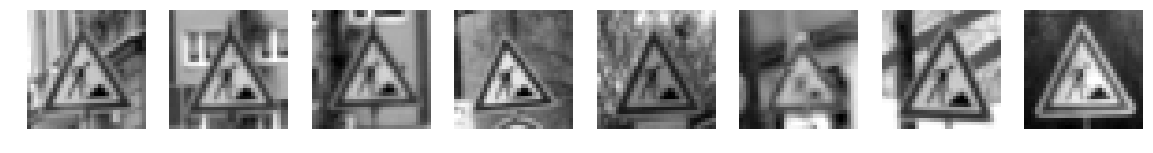

Class  26 -- Traffic signals  # Samples: 540
[1611 1653 1274 1280 1595 1723 1458 1436]


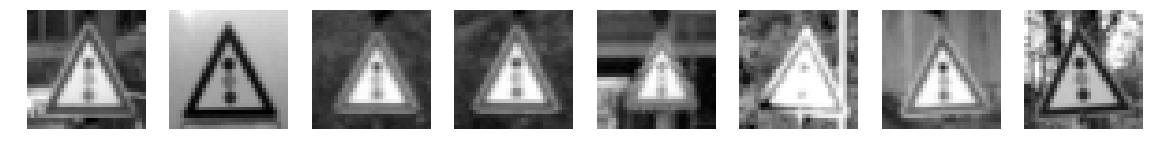

Class  27 -- Pedestrians  # Samples: 210
[10395 10419 10371 10372 10402 10463 10409 10353]


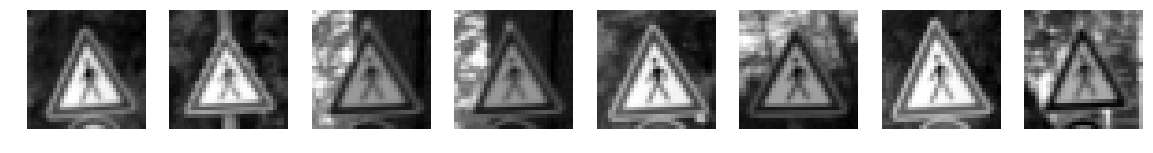

Class  28 -- Children crossing  # Samples: 480
[27237 27094 27225 27239 26890 27097 26988 26883]


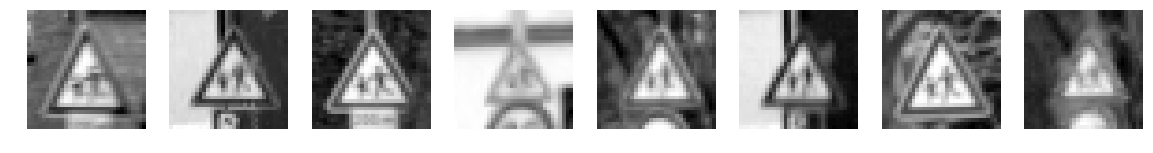

Class  29 -- Bicycles crossing  # Samples: 240
[10571 10697 10575 10604 10661 10750 10766 10678]


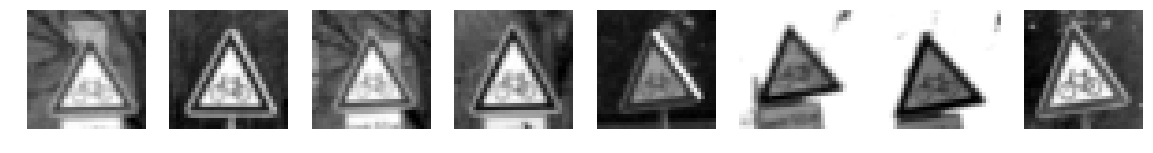

Class  30 -- Beware of ice/snow  # Samples: 390
[25051 25132 25357 25185 25241 25242 25362 25380]


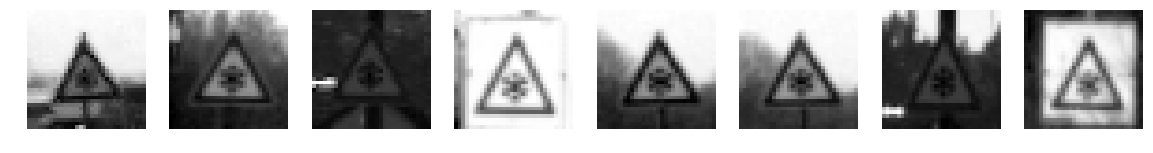

Class  31 -- Wild animals crossing  # Samples: 690
[365 653 892 616 894 333 837 232]


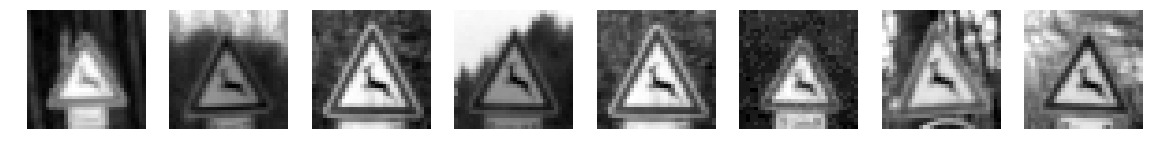

Class  32 -- End of all speed and passing limits  # Samples: 210
[10147 10236 10264 10300 10261 10204 10144 10198]


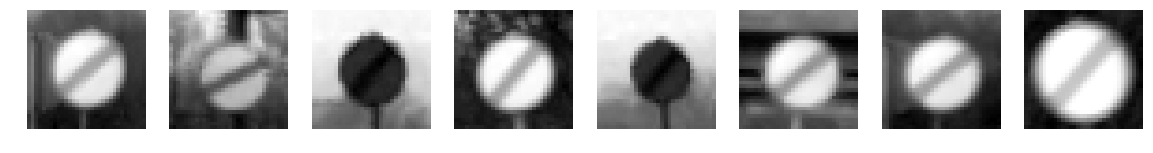

Class  33 -- Turn right ahead  # Samples: 599
[26682 26284 26576 26654 26506 26553 26275 26438]


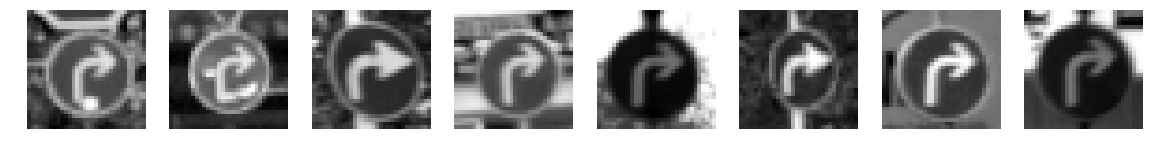

Class  34 -- Turn left ahead  # Samples: 360
[20218 20137 20172 20282 20189 20046 20158 20345]


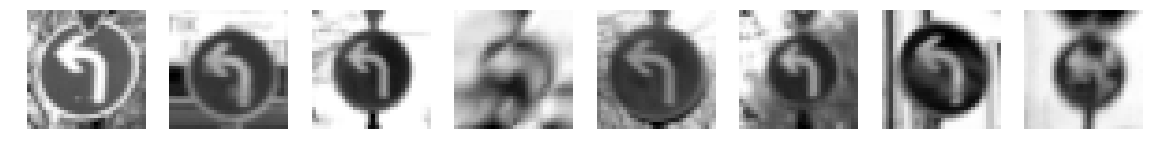

Class  35 -- Ahead only  # Samples: 1080
[19149 19623 19242 19976 19420 19424 19668 19826]


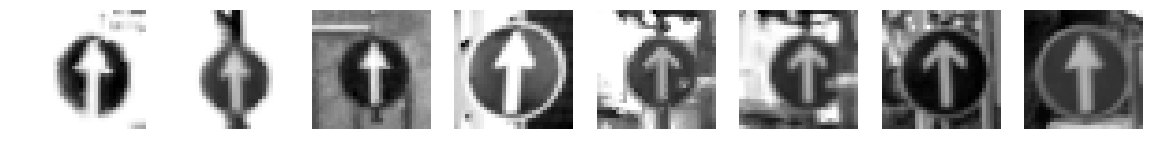

Class  36 -- Go straight or right  # Samples: 330
[ 904 1211 1031 1048  982  901 1111 1164]


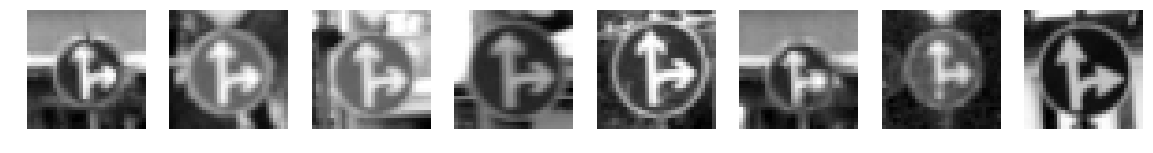

Class  37 -- Go straight or left  # Samples: 180
[4859 4946 4844 4936 5006 4978 4853 4985]


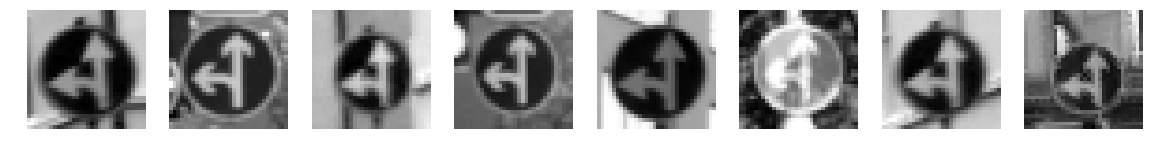

Class  38 -- Keep right  # Samples: 1860
[15051 15823 15797 14046 15679 15097 14506 14822]


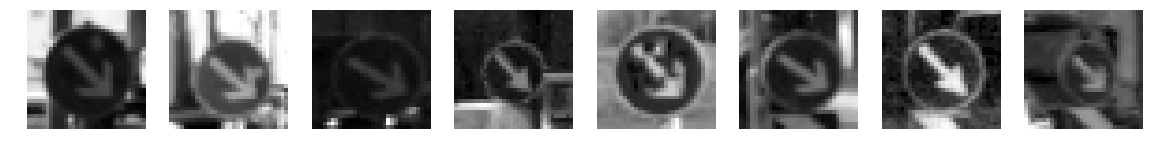

Class  39 -- Keep left  # Samples: 270
[25666 25672 25518 25667 25513 25532 25517 25449]


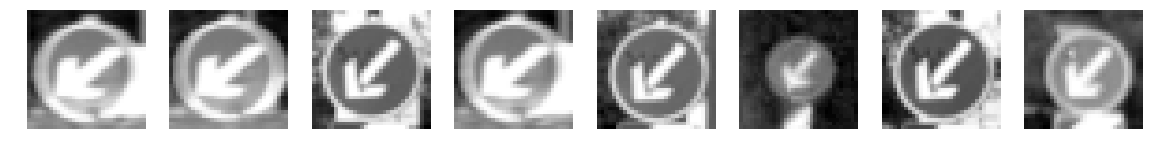

Class  40 -- Roundabout mandatory  # Samples: 300
[4296 4231 4496 4344 4379 4326 4489 4339]


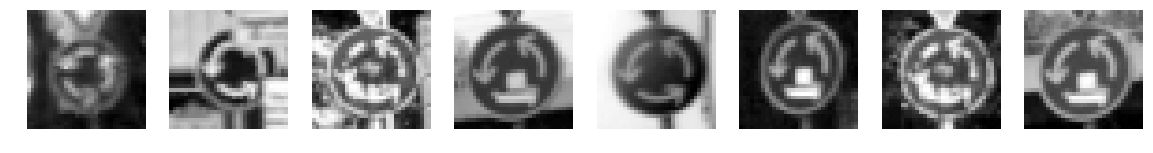

Class  41 -- End of no passing  # Samples: 210
[204  98 145  23 132 188  92 123]


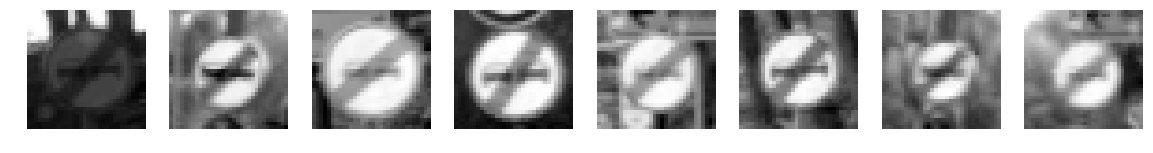

Class  42 -- End of no passing by vehicles over 3.5 metric tons  # Samples: 210
[9926 9770 9934 9906 9954 9919 9894 9932]


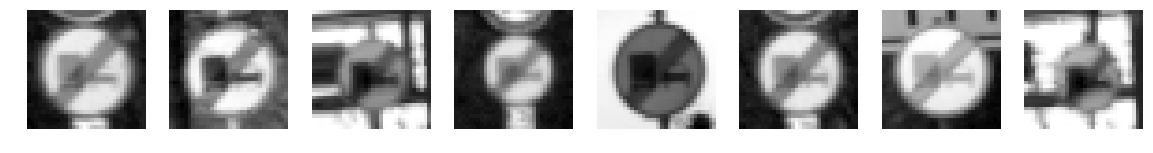

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0

In [20]:
_ = display_random_data(x_train_test,y_train,signnames,load_index=saved_index)

In [10]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)

NameError: name 'x_train' is not defined

### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
EPOCHS = 80
BATCH_SIZE = 100

In [8]:
from tensorflow.contrib.layers import flatten
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

# ADD BACK COVNET LAYER AND IMPLMENT LEARNING RATE DECADE
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Store layers weight & bias
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 8],mean=mu,stddev=sigma)),
        'wc2': tf.Variable(tf.truncated_normal([5, 5, 8, 32],mean=mu,stddev=sigma)),
#         'wc3': tf.Variable(tf.truncated_normal([3, 3, 32, 64],mean=mu,stddev=sigma)),
        'wf1': tf.Variable(tf.truncated_normal([800, 400], mean=mu,stddev=sigma)),
        'wf2': tf.Variable(tf.truncated_normal([400, 200],mean=mu,stddev=sigma)),
        'wf3': tf.Variable(tf.truncated_normal([200, 100],mean=mu,stddev=sigma)),
        'out': tf.Variable(tf.truncated_normal([100, 43],mean=mu,stddev=sigma))}

    biases = {
        'bc1': tf.Variable(tf.truncated_normal([8],mean=mu,stddev=sigma)),
        'bc2': tf.Variable(tf.truncated_normal([32],mean=mu,stddev=sigma)),
#         'bc3': tf.Variable(tf.truncated_normal([64],mean=mu,stddev=sigma)),
        'bf1': tf.Variable(tf.zeros(400)),
        'bf2': tf.Variable(tf.zeros(200)),
        'bf3': tf.Variable(tf.zeros(100)),
        'out': tf.Variable(tf.zeros(43))}
    
    # TODO: Layer 1: Convolutional, filter 5x5. Input = 32x32x1. Output = 28x28x8.
    convnet1 = conv2d(x,weights['wc1'],biases['bc1'])

    # TODO: Pooling. Input = 28x28x8. Output = 14x14x32.
    convnet1 = maxpool2d(convnet1, k=2)

    # TODO: Layer 2: Convolutional,filter 5x5. Output = 10x10x32.
    convnet2 = conv2d(convnet1,weights['wc2'],biases['bc2'])

    # TODO: Pooling. Input = 10x10x32. Output = 5*5*32.
    convnet2 = maxpool2d(convnet2,k=2)
    
#     # TODO: Layer 3: Convolutional, filter 3x3 . Output = 4x4x64.
#     convnet3 = conv2d(convnet2,weights['wc3'],biases['bc3'])
    
#     # TODO: Pooling. Input = 4x4x64. Output = 2x2x84.
#     convnet3 = maxpool2d(convnet3,k=2)

    # TODO: Flatten. Input = 4x4x64. Output = 800.
    fc0 = flatten(convnet2)

    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 560.
    fc1 = tf.add(tf.matmul(fc0,weights['wf1']),biases['bf1'])
    
#     # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1,0.5)
    
    # TODO: Layer 5: Fully Connected. Input = 560. Output = 280.
    fc2 = tf.add(tf.matmul(fc1,weights['wf2']),biases['bf2'])
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2,0.5)

#     TODO: Layer 6: Fully Connected. Input = 280. Output = 120.
    
    fc3 = tf.add(tf.matmul(fc2,weights['wf3']),biases['bf3'])
    
    # TODO: Activation.
    fc3 = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3,0.5)

    # TODO: Layer 7: Fully Connected. Input = 120. Output = 43.
    logits = tf.add(tf.matmul(fc3,weights['out']),biases['out'])
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.0005

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Model Evaluation

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Training session

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        training_accuracy = evaluate(x_train, y_train)    
        validation_accuracy = evaluate(x_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.316
Validation Accuracy = 0.279

EPOCH 2 ...
Training Accuracy = 0.595
Validation Accuracy = 0.568

EPOCH 3 ...
Training Accuracy = 0.740
Validation Accuracy = 0.711

EPOCH 4 ...
Training Accuracy = 0.803
Validation Accuracy = 0.755

EPOCH 5 ...
Training Accuracy = 0.853
Validation Accuracy = 0.792

EPOCH 6 ...
Training Accuracy = 0.882
Validation Accuracy = 0.829

EPOCH 7 ...
Training Accuracy = 0.899
Validation Accuracy = 0.837

EPOCH 8 ...
Training Accuracy = 0.919
Validation Accuracy = 0.859

EPOCH 9 ...
Training Accuracy = 0.928
Validation Accuracy = 0.863

EPOCH 10 ...
Training Accuracy = 0.936
Validation Accuracy = 0.869

EPOCH 11 ...
Training Accuracy = 0.942
Validation Accuracy = 0.885

EPOCH 12 ...
Training Accuracy = 0.952
Validation Accuracy = 0.891

EPOCH 13 ...
Training Accuracy = 0.957
Validation Accuracy = 0.893

EPOCH 14 ...
Training Accuracy = 0.961
Validation Accuracy = 0.894

EPOCH 15 ...
Training Accuracy = 0.965
Valid

### Using the test data

In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.931


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

3


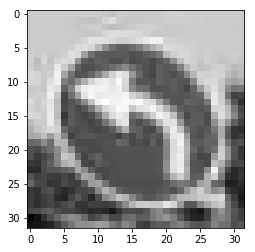

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import glob
import cv2
import numpy as np

my_web_x = []
my_web_y = []
folder_name='web_images/'

for image_file in glob.glob(folder_name + '*.jpeg'):
    image = cv2.resize(np.array(mpimg.imread(image_file)),(32,32))
    my_web_x.append(norm_img(image))
    my_web_y.append(int(image_file[len(folder_name):(len(folder_name)+2)]))

for image_file in glob.glob(folder_name + '*.png'):
    image = cv2.cvtColor(mpimg.imread(image_file),cv2.COLOR_RGBA2RGB)
#     print(image.shape)
    my_web_x.append(norm_img(image))
    my_web_y.append(int(image_file[len(folder_name):(len(folder_name)+2)]))
    
print(my_web_y[3])
# print (my_web_x)

plt.imshow(my_web_x[4].squeeze(),cmap='gray')



### Predict the Sign Type for Each Image

In [30]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
prediction=tf.argmax(logits,1)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = sess.run(prediction,feed_dict={x: my_web_x})
    print ("predictions", prediction)
print('labels:',my_web_y)
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
accur = 0
for i in range(len(prediction)):
    if prediction[i] == my_web_y[i]:
        accur += 1
print('Total accuracy:',accur/len(prediction))

INFO:tensorflow:Restoring parameters from ./lenet
predictions [38 38 33  3 13]
labels: [38, 28, 25, 3, 34]
Total accuracy: 0.4


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


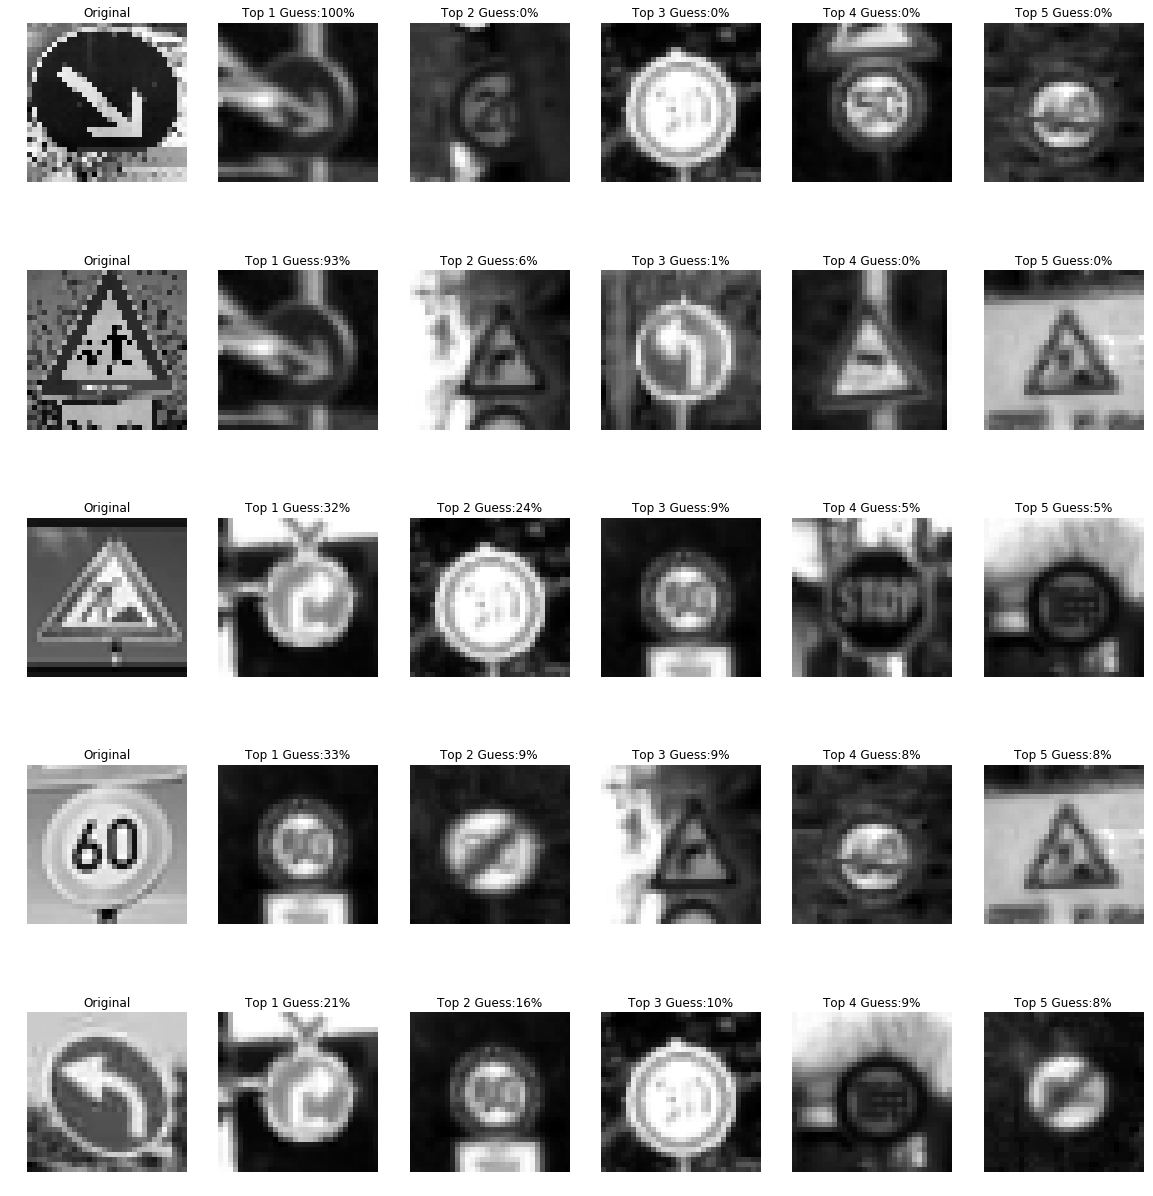

In [31]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

k_size = 5
soft_max = tf.nn.softmax(logits)
top_k = tf.nn.top_k(soft_max,k=k_size)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_softmax = sess.run(soft_max,feed_dict={x:my_web_x})
    my_top_k = sess.run(top_k,feed_dict={x:my_web_x})
    
fig,axs = plt.subplots(len(my_web_x),k_size+1,figsize=(20,22))
axs = axs.ravel()

for i, image in enumerate(my_web_x):
    offset = (k_size+1)*i
    for j in range(k_size+1):
        axs[offset+j].axis('off')
        if j == 0:
            axs[offset+j].imshow(image.squeeze(),cmap='gray')
            axs[offset+j].set_title('Original')
        else:
            probability =  my_top_k[1][i][j-1]
            valid_index = np.argwhere(y_valid == probability)[0]
            axs[offset+j].imshow(x_valid[valid_index].squeeze(),cmap='gray')
            axs[offset+j].set_title('Top {} Guess:{:.0f}%'.format(j,100*my_top_k[0][i][j-1]))     


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")